# ICTS IAGRG SCHOOL 3

*Cosmic Tensions and Early Dark Energy*

**The Cosmological Standard Model, its tensions and new physics**

Lectures by Florian Niedermann 

Tutorials by Purba Mukherjee

Email: purba16@gmail.com

In [1]:
import os
import subprocess

import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad
from scipy.constants import c as c_kms

c = c_kms/1000.

# Trigger CLASS

In [2]:
directory = "TriggerCLASS"
repo_url = "https://github.com/NEDE-Cosmo/TriggerCLASS.git"

if not os.path.isdir(directory):
    print(f"Directory {directory} does not exist. Cloning repository...")
    try:
        result = subprocess.run(["git", "clone", repo_url], check=True, capture_output=True, text=True)
        print(result.stdout)
        print(f"Repository cloned successfully into {directory}.")
    except subprocess.CalledProcessError as e:
        print(f"Error occurred while cloning the repository: {e.stderr}")
else:
    print(f"Directory {directory} already exists.")

Directory TriggerCLASS already exists.


**Installing TriggerCLASS**

Open Terminal:

$ cd class_public

$ make -j // PYTHON=python3 make -j

$ cd python

$ python setup.py build

$ python setup.py install --user

In [3]:
workdir = os.getcwd()

os.chdir("TriggerCLASS")
!make -j
#!PYTHON=python3 make -j

os.chdir("python")
!python setup.py build
!python setup.py install --user

#!python3 setup.py build
#!python3 setup.py install --user
os.chdir(workdir)

cp python/setup.py python/autosetup.py
cd python; export CC=gcc; python autosetup.py install || python autosetup.py install --user
running install
running build
running build_ext
There is a workaround to now inherit optimization CFLAGS when compiling wheels.
To enable this, set APPLY_LP2002043_UBUNTU_CFLAGS_WORKAROUND in your
environment. See LP: https://launchpad.net/bugs/2002043 for further context.
APPLY_LP2002043_UBUNTU_CFLAGS_WORKAROUND not detected.
skipping '/home/purba/Downloads/icts_iagrg3_school_2024/Florian/Tutorial_Notebooks/TriggerCLASS/python/../python/classy.c' Cython extension (up-to-date)
building 'classy' extension
creating build/temp.linux-x86_64-2.7
creating build/temp.linux-x86_64-2.7/home
creating build/temp.linux-x86_64-2.7/home/purba
creating build/temp.linux-x86_64-2.7/home/purba/Downloads
creating build/temp.linux-x86_64-2.7/home/purba/Downloads/icts_iagrg3_school_2024
creating build/temp.linux-x86_64-2.7/home/purba/Downloads/icts_iagrg3_school_2024/Florian
cr

In [4]:
import classy
classy.__version__

'v2.9.4'

In [5]:
from classy import Class

In [6]:
Trigger = Class()
Trigger.set({'Omega_cdm':0.25,'Omega_b':0.05,'f_NEDE':0.20,'z_decay_NEDE':4300})
Trigger.compute()

In [7]:
zz = np.linspace(0, 10, 1001)

H0_trigger = Trigger.Hubble(0)*c
Hz_trigger = []

for i in range(len(zz)):
    Hz_trigger.append(Trigger.Hubble(zz[i])*c)

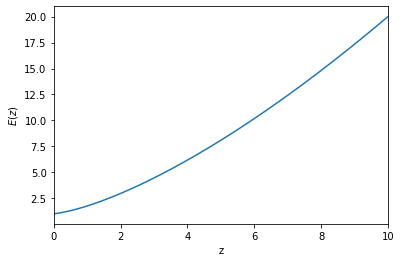

In [8]:
plt.xlim(0., 10.)
plt.xlabel("z")
plt.ylabel("$E(z)$")
plt.plot(zz, np.array(Hz_trigger)/H0_trigger)

plt.show()

# **Problem 8 <span style="color:blue">[Boltzmann solver]</span>:**

**(a) Follow the instructions on the website to install the software on your laptop.**

**(b) Plot the CMB temperature power spectrum for the ΛCDM cosmology.**

**(c) Increase the value of $H_0$ to the SH0ES value while keeping the angular size of the sound horizon $\theta_s$ fixed.**

This can be achieved by lowering the (dimensionless) cold dark matter density $\omega_{\rm cdm}$

**How does the power spectrum change after this position adjustment ?**

**(d) Run the typical new early dark energy cosmology. Show that increasing $f_{\rm NEDE}$ and increasing $H_0$ act oppositely on the temperature power spectrum.**

*Again, keep $\theta_s$ fixed by adapting $\omega_{\rm cdm}$*

**1. Compare the linear $P(k)$ vs $k$ obtained for $\Lambda$CDM cosmology and NEDE model with TriggerCLASS**

**2. Plot $\frac{P(k)_{\rm linear \vert NEDE}}{P(k)_{\rm linear \vert \Lambda CDM}} - 1$ vs $k$ obtained for $\Lambda$CDM cosmology and NEDE model with TriggerCLASS**